# Algerina_Forest_MahchineLearning_Project - EDA

### Data Attribute Information:
- https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++#

1. `Date :` (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations
2. `Temp :` temperature noon (temperature max) in Celsius degrees: 22 to 42
3. `RH :` Relative Humidity in %: 21 to 90
4. `Ws :` Wind speed in km/h: 6 to 29
5. `Rain:` total day in mm: 0 to 16.8 
***FWI Components***

6. `Fine Fuel Moisture Code (FFMC):` index from the FWI system: 28.6 to 92.5
7. `Duff Moisture Code (DMC):` index from the FWI system: 1.1 to 65.9
8. `Drought Code (DC):` index from the FWI system: 7 to 220.4
9. `Initial Spread Index (ISI):` index from the FWI system: 0 to 18.5
10. `Buildup Index (BUI):` index from the FWI system: 1.1 to 68
11. `Fire Weather Index (FWI):` Index: 0 to 31.1
12. `Classes:` two classes, namely Fire and not Fire

In [199]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [200]:
df = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",header=1)

In [201]:
df.shape

(246, 14)

In [202]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [203]:
df.loc[:122,'Region'] = 1 
df.loc[122:,'Region'] = 2 
df[['Region']] = df[['Region']].astype(int)

In [204]:
df_dict = df.to_dict(orient='records')

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 28.0+ KB


In [206]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [207]:
df.shape

(246, 15)

In [208]:
df = df.dropna().reset_index(drop=True)
df.shape

(244, 15)

In [209]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1


In [210]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [211]:
df[df.isnull().any(axis=1)] #finding a missing values of row          
df = df.dropna()

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  Region       244 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 29.5+ KB


In [213]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [214]:
df.columns = [x.replace(" ",'') for x in df.columns]
df.columns = df.columns.str.strip() # alternative way

In [215]:
df.columns # done iregular space removed form name of attributes

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [216]:
print(df.shape)
df.isnull().sum()

(244, 15)


day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [217]:
df.head(3)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1


In [218]:
df.shape

(244, 15)

In [219]:
df = df.drop(122).reset_index(drop=True)

In [220]:
df.shape

(243, 15)

- except Classes columns remaining all attributs are int and float dtypes

In [221]:
int_attrs = ['day', 'month', 'year', 'Temperature', 'RH', 'Ws']
float_attrs = ['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
categorical_attrs = ['Classes']

In [222]:
df.columns.dtype == 'O'

True

In [223]:
df['day'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31'], dtype=object)

In [224]:
df[df.day == 'day'].index

Int64Index([], dtype='int64')

In [225]:
df.index

RangeIndex(start=0, stop=243, step=1)

In [226]:
df.day.unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31'], dtype=object)

In [227]:
df[int_attrs] = df[int_attrs].astype(int)
df[float_attrs] = df[float_attrs].astype(float)

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [229]:
df.isnull().sum().to_frame()

,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0


In [230]:
df.shape

(243, 15)

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [232]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [233]:
#df.Classes = df.Classes.apply(lambda x : 0 if x=='not fire' else 1) # replacing binary value for classes

In [234]:
df_corr = df[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']].corr()
df_corr

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000


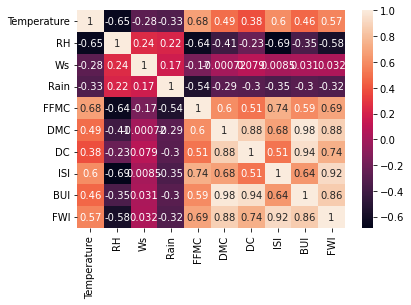

In [235]:
# plt.Figure(figsize=(20,20))
sns.heatmap(df_corr,annot=True)
plt.show()

In [236]:
df_corr['Temperature']
# we have sean that , FFMC, DMC, DC, ISI, BUI,FWI all are positive correlated to temperature

Temperature    1.000000
RH            -0.651400
Ws            -0.284510
Rain          -0.326492
FFMC           0.676568
DMC            0.485687
DC             0.376284
ISI            0.603871
BUI            0.459789
FWI            0.566670
Name: Temperature, dtype: float64

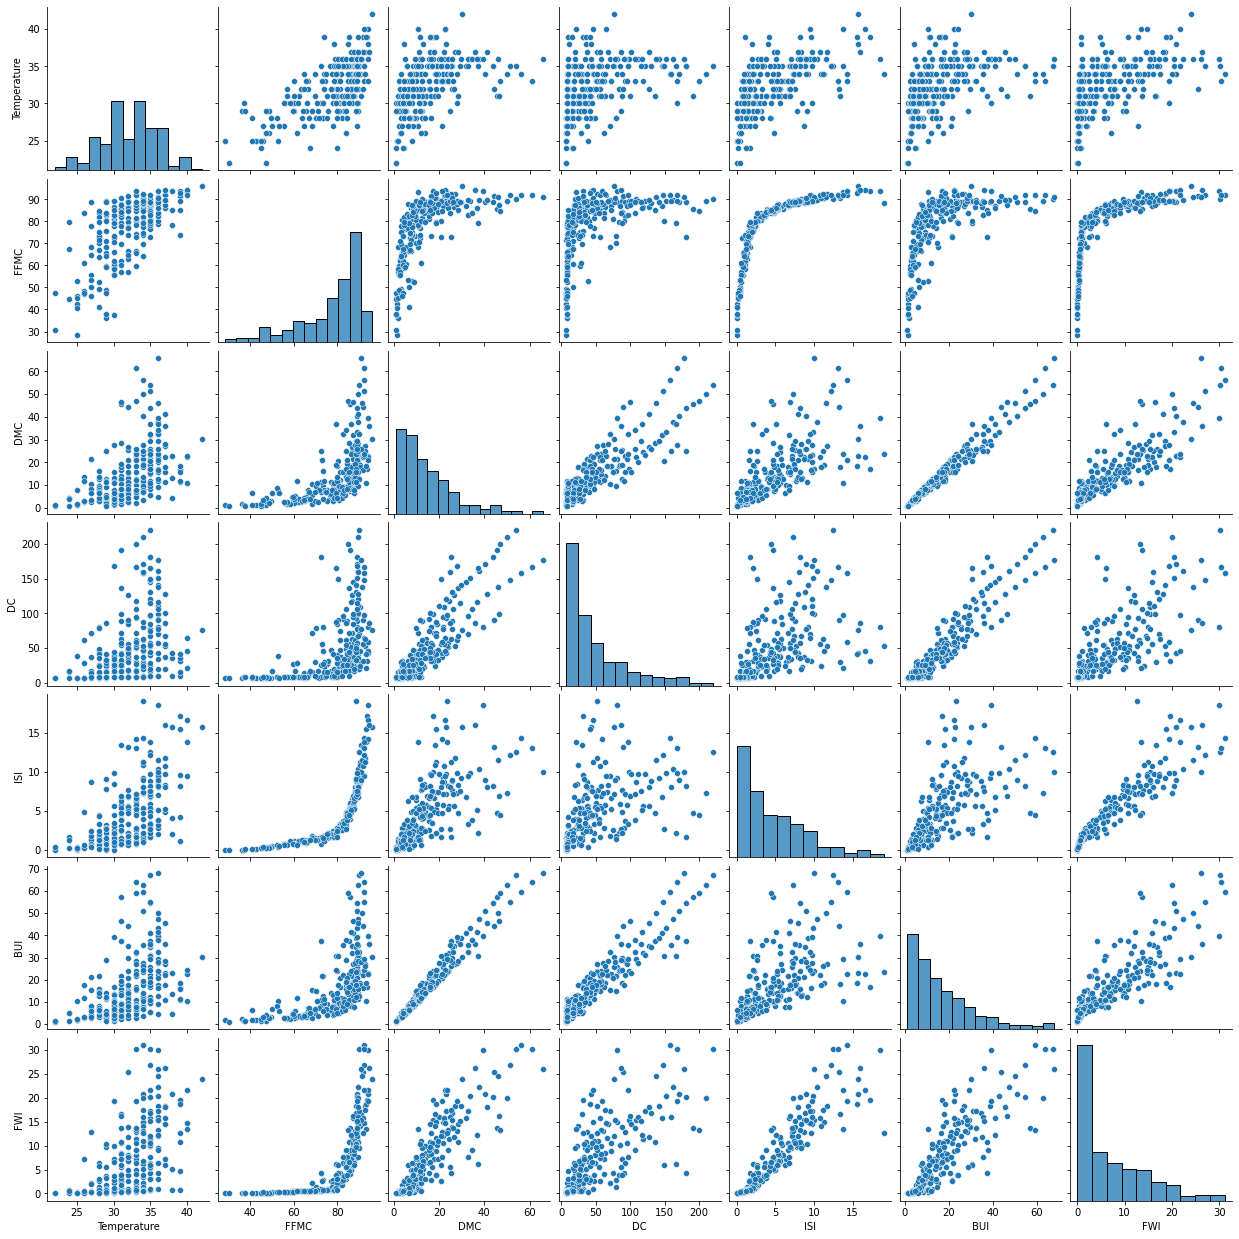

In [237]:
sns.pairplot(df[['Temperature', 'FFMC','DMC','DC','ISI','BUI','FWI','Classes']])

In [238]:
df[['Classes','FWI','Temperature', 'FFMC','DMC','DC','ISI','BUI']].corr()

,FWI,Temperature,FFMC,DMC,DC,ISI,BUI
FWI,1.000000,0.566670,0.691132,0.875864,0.739521,0.922895,0.857973
Temperature,0.566670,1.000000,0.676568,0.485687,0.376284,0.603871,0.459789
FFMC,0.691132,0.676568,1.000000,0.603608,0.507397,0.740007,0.592011
DMC,0.875864,0.485687,0.603608,1.000000,0.875925,0.680454,0.982248
DC,0.739521,0.376284,0.507397,0.875925,1.000000,0.508643,0.941988
ISI,0.922895,0.603871,0.740007,0.680454,0.508643,1.000000,0.644093
BUI,0.857973,0.459789,0.592011,0.982248,0.941988,0.644093,1.000000


In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [240]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4


In [241]:
df.Classes.value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [242]:
df.Classes = df.Classes.apply(lambda x : x.strip())

In [243]:
df.Classes.value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

#### Region 1 (Bejaia Region)

In [244]:
df[:122]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire,1
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire,1
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,1
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,1


#### Region 2 (Sidi-Bel Abbes Region)

In [245]:
df[122:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2
125,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,2
126,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


### Saving a Cleanded DATA

In [246]:
df.to_csv("Algerian_fires_data_Cleaned.csv", index=False)

## EDA

In [247]:
df1 = df.drop(['day','month','year'],axis=1)

In [249]:
df1.Classes.value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [250]:
df1.Classes = np.where(df.Classes == 'not fire',0,1)
df1.Classes.value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [254]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int32  
 1   RH           243 non-null    int32  
 2   Ws           243 non-null    int32  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int32  
 11  Region       243 non-null    int32  
dtypes: float64(7), int32(5)
memory usage: 18.2 KB


#### visualizations fo distribution

array([[<AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'Ws'}>],
       [<AxesSubplot:title={'center':'Rain'}>,
        <AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>],
       [<AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>,
        <AxesSubplot:title={'center':'BUI'}>],
       [<AxesSubplot:title={'center':'FWI'}>,
        <AxesSubplot:title={'center':'Classes'}>,
        <AxesSubplot:title={'center':'Region'}>]], dtype=object)

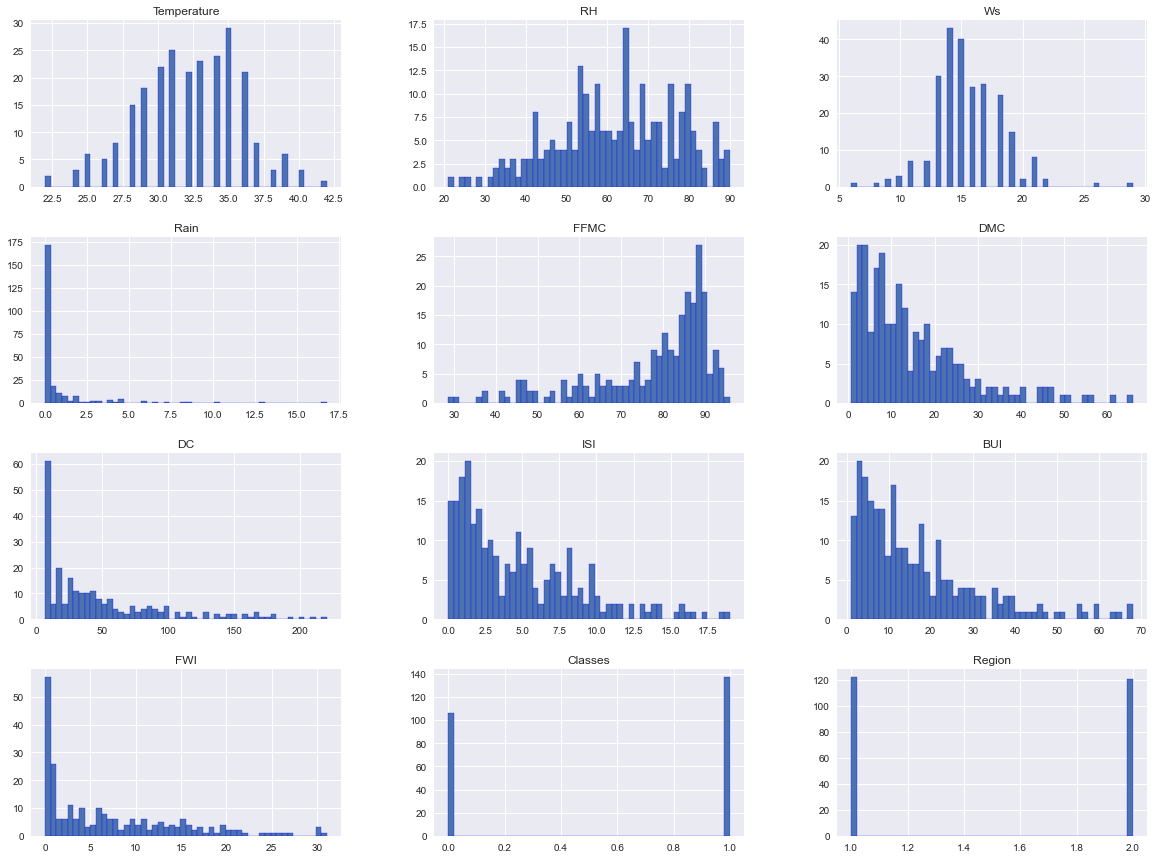

In [255]:
plt.style.use('seaborn')
df1.hist(bins=50, figsize=(20,15), ec='b')

In [257]:
percentage = df.Classes.value_counts(normalize=True)

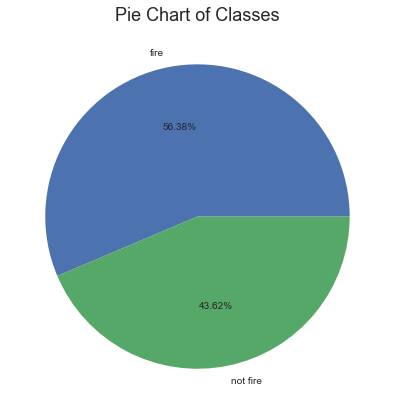

In [265]:
classeslabels = ['fire','not fire']
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classeslabels,autopct='%1.2f%%')
plt.title('Pie Chart of Classes', fontsize=18)
plt.show()

### Checking Multicolinearity

In [301]:
df1.corr().nlargest(len(df1.columns),'Classes')['Classes']

Classes        1.000000
FFMC           0.769492
ISI            0.735197
FWI            0.719216
BUI            0.586639
DMC            0.585658
Temperature    0.516015
DC             0.511123
Region         0.162347
Ws            -0.069964
Rain          -0.379097
RH            -0.432161
Name: Classes, dtype: float64

In [323]:
corr_1 = df1.corr()['Classes'].to_frame()
corr_1.sort_values(by = ['Classes'],ascending=False)

,Classes
Classes,1.000000
FFMC,0.769492
ISI,0.735197
FWI,0.719216
BUI,0.586639
DMC,0.585658
Temperature,0.516015
DC,0.511123
Region,0.162347
Ws,-0.069964


In [352]:
df1_corr = df1.corr()['Classes'].sort_values(ascending=False).index
df1_corr.values

array(['Classes', 'FFMC', 'ISI', 'FWI', 'BUI', 'DMC', 'Temperature', 'DC',
       'Region', 'Ws', 'Rain', 'RH'], dtype=object)

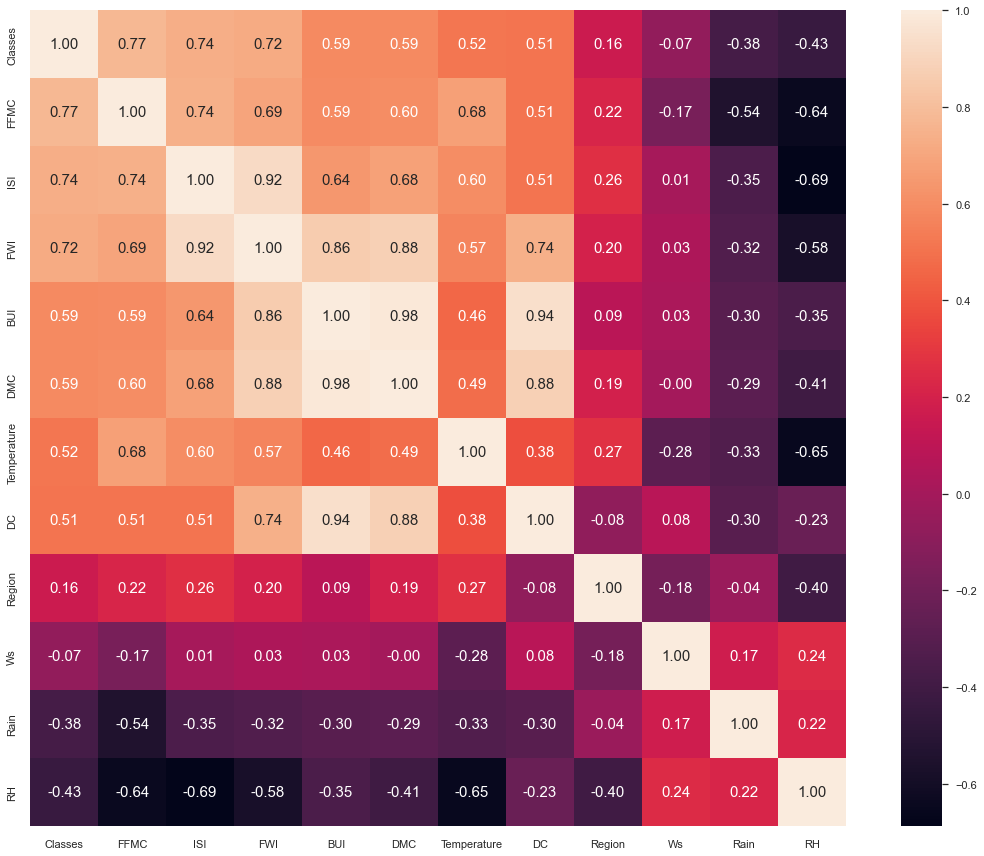

In [355]:
df1_corr = df1.corr()['Classes'].sort_values(ascending=False).index
df1[df1_corr].values.T
corr_coef = np.corrcoef(df1[df1_corr].values.T)

sns.set(font_scale=1)
f,ax = plt.subplots(figsize=(20,15))

heat_map= sns.heatmap(corr_coef, annot=True, square=True, fmt='.2f',annot_kws={'size':15}, yticklabels= df1_corr.values, xticklabels=df1_corr.values)
plt.show()

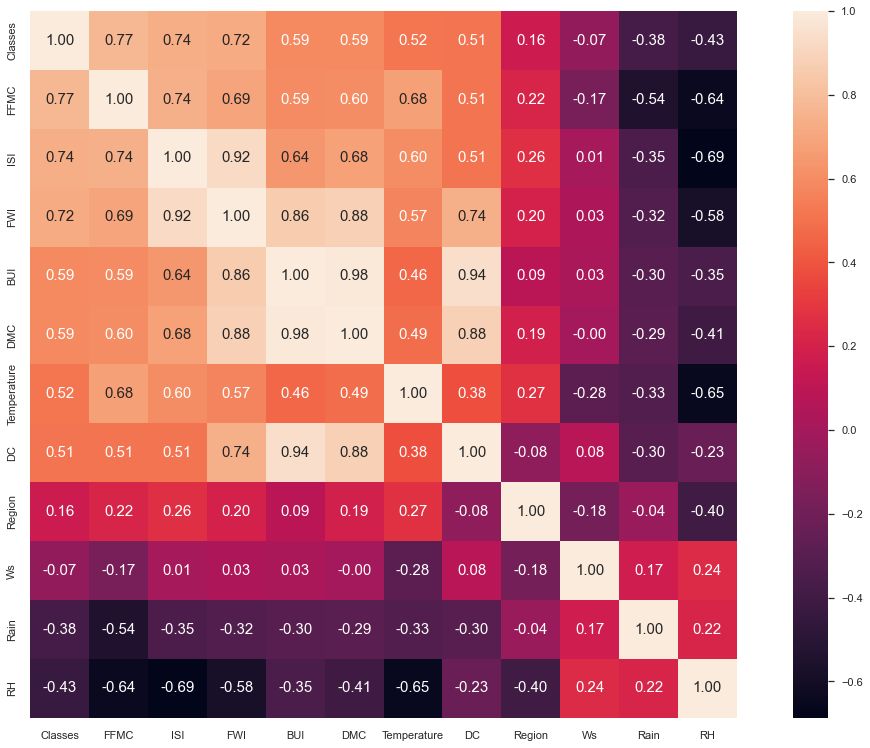

In [298]:
# Correlation chart
corr = df1.corr()
k = len(df1.columns)

cols = corr.nlargest(k, 'Classes')['Classes'].index

cm = np.corrcoef(df1[cols].values.T)

sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(20, 13))
hm = sns.heatmap(cm, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Analysis
- Monthwise

In [359]:
df.loc[df['Region']==1]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire,1
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire,1
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,1
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,1


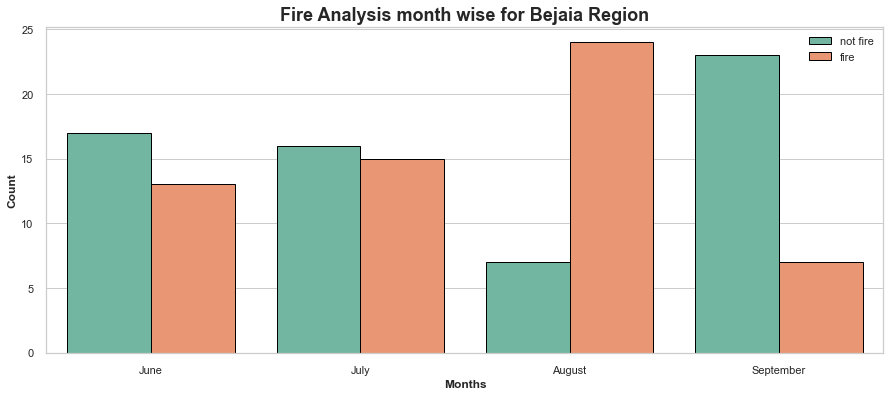

In [381]:
dftemp = df.loc[df['Region']==1]

plt.subplots(figsize=(15,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=dftemp,ec='black',palette='Set2')

plt.title('Fire Analysis month wise for Bejaia Region',fontsize=18,weight='bold')
plt.ylabel('Count',weight='bold')
plt.xlabel('Months',weight='bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4),['June','July','August','September'])
plt.show()

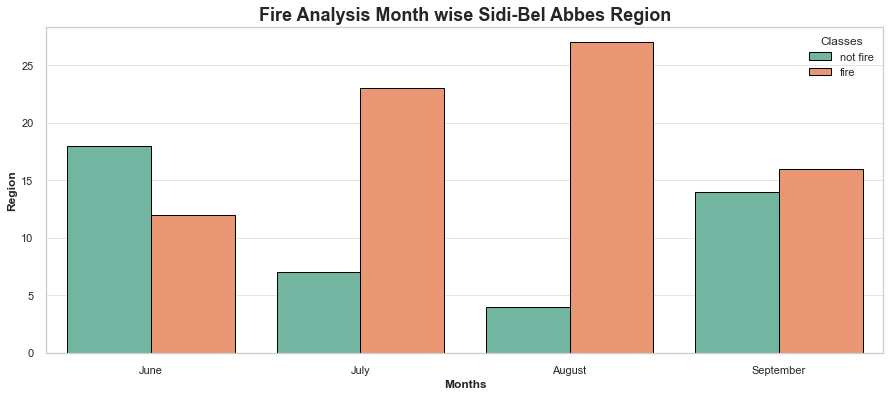

In [383]:
dftemp2 = df.loc[df['Region']==2]

plt.subplots(figsize=(15,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=dftemp2, ec='black',palette='Set2')

plt.title('Fire Analysis Month wise Sidi-Bel Abbes Region',fontsize=18,weight='bold')
plt.ylabel('Region',weight='bold')
plt.xlabel('Months',weight='bold')
plt.xticks(np.arange(4),['June','July','August','September'])
plt.grid(alpha=0.5,axis='y')
plt.show()

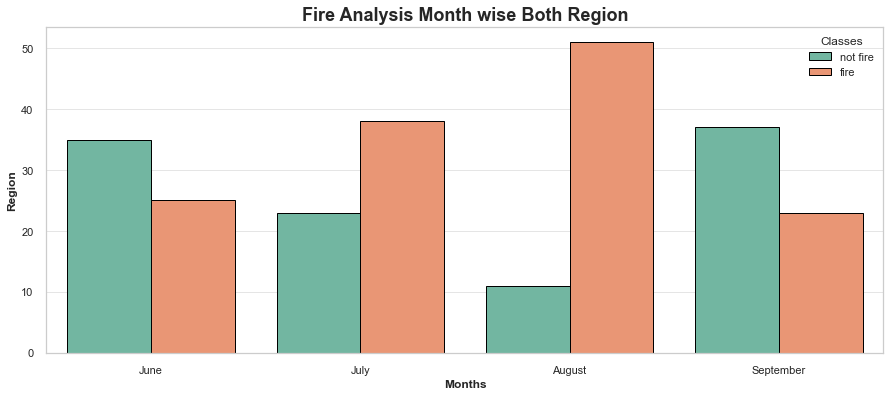

In [384]:
# Overall datasets

plt.subplots(figsize=(15,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df, ec='black',palette='Set2')

plt.title('Fire Analysis Month wise Both Region',fontsize=18,weight='bold')
plt.ylabel('Region',weight='bold')
plt.xlabel('Months',weight='bold')
plt.xticks(np.arange(4),['June','July','August','September'])
plt.grid(alpha=0.5,axis='y')
plt.show()

In [388]:
df.month.unique()

array([6, 7, 8, 9])

## EDA on all Features

In [389]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [398]:
df1.groupby(['Temperature'],as_index=False)['Classes'].sum()

,Temperature,Classes
0,22,0
1,24,0
2,25,0
3,26,1
4,27,1
5,28,3
6,29,5
7,30,7
8,31,16
9,32,12


In [390]:
def barchart(feature,xlabel):
    plt.figure(figsize=(15,9))
    by_feature = df1.groupby([feature], as_index=False)['Classes'].sum()
    ax = sns.barplot(x=feature,y='Classes',data=by_feature[[feature,'Classes']], estimator=sum)
    ax.set(xlabel=xlabel,ylabel='Fire Count')

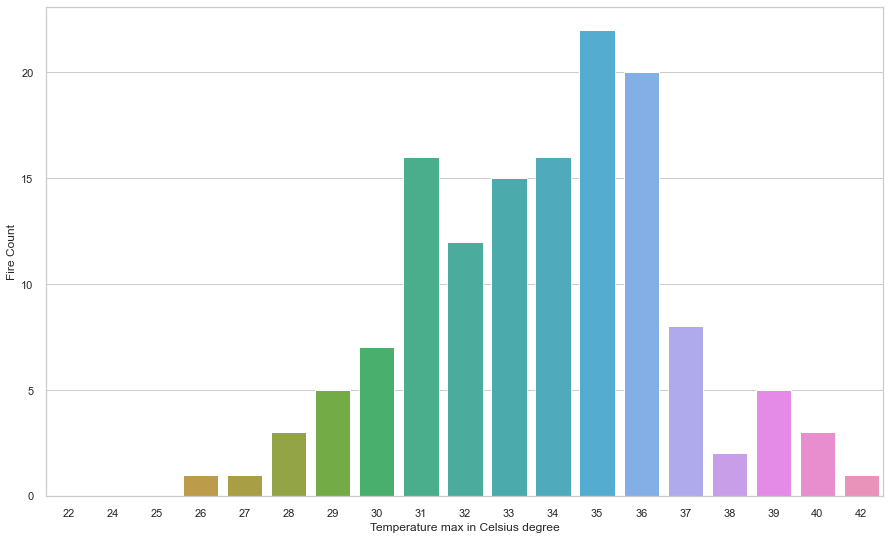

In [391]:
barchart('Temperature','Temperature max in Celsius degree')

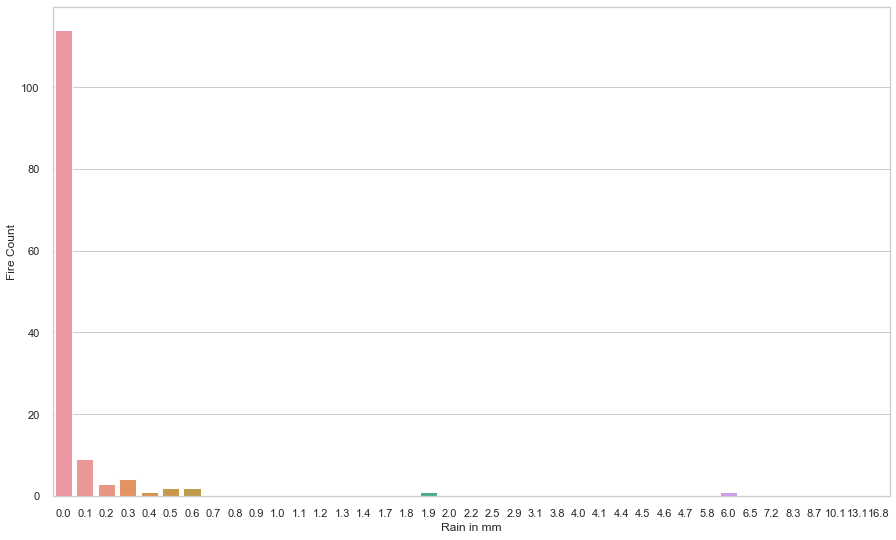

In [392]:
barchart('Rain','Rain in mm')

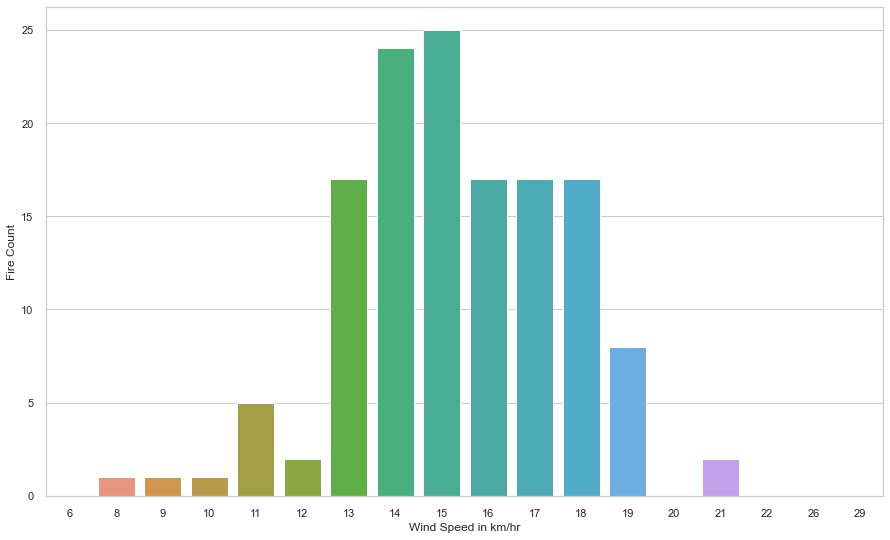

In [399]:
barchart('Ws','Wind Speed in km/hr')

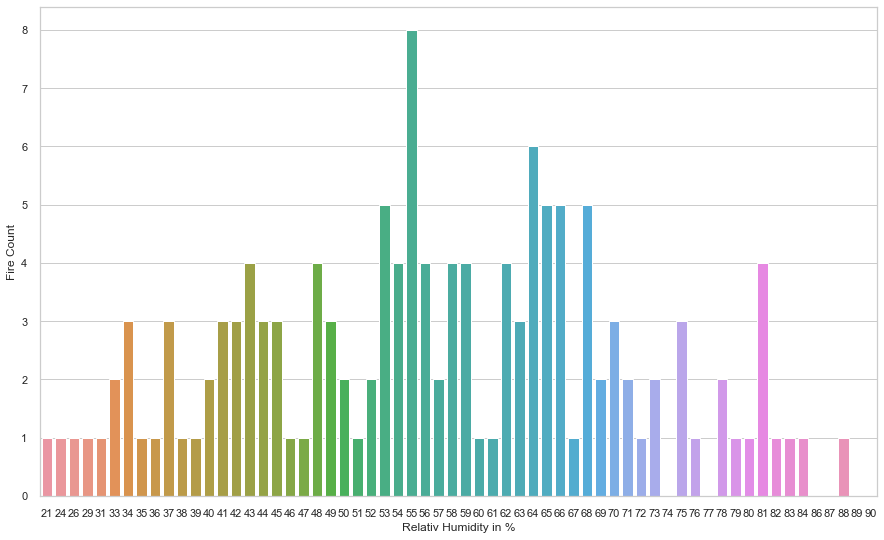

In [400]:
barchart('RH','Relativ Humidity in %')

In [402]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

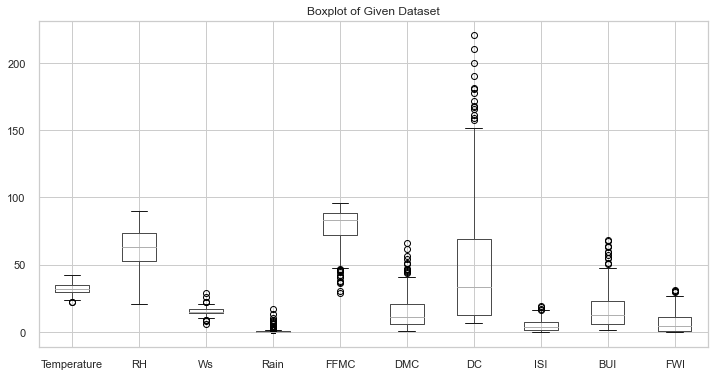

In [403]:
dfTemp = df1.drop(['Classes','Region'],axis=1)
fig = plt.figure(figsize=(12,6))
ax = dfTemp.boxplot()
ax.set_title('Boxplot of Given Dataset')
plt.show()

In [404]:
df_temp = df_temp= df1.drop(['Region','Temperature','Rain','Ws','RH'],axis=1)

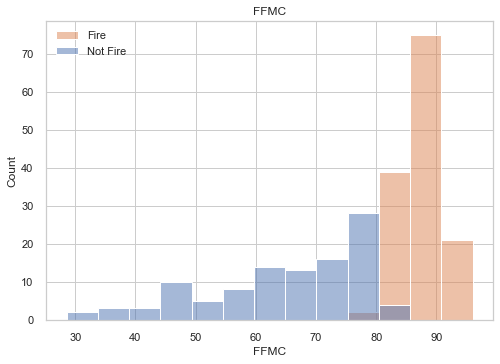

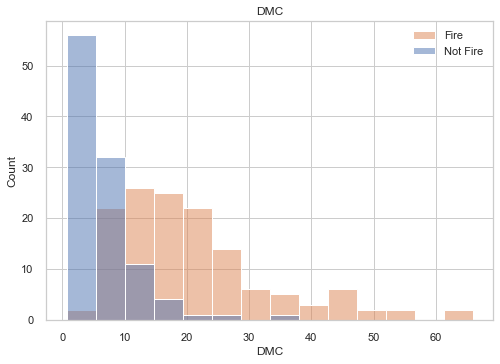

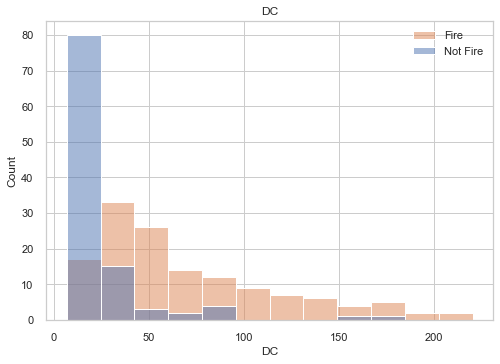

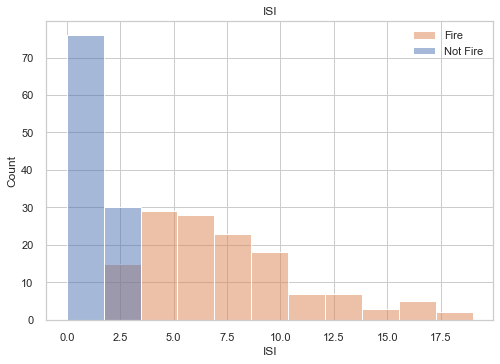

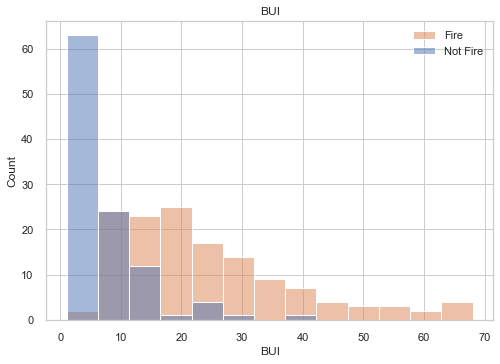

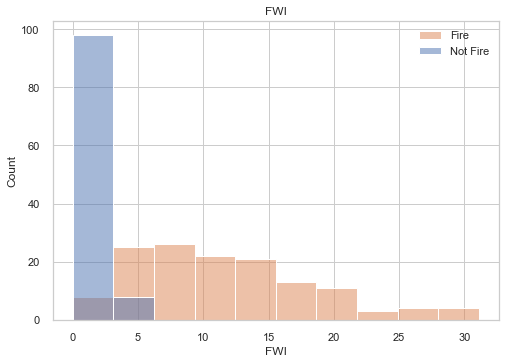

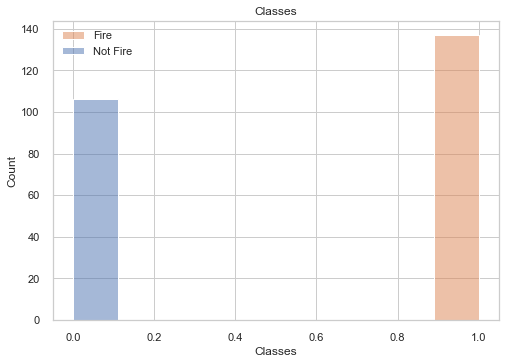

In [405]:
for feature in df_temp:
    sns.histplot(data=df_temp,x=feature,hue='Classes')
    plt.legend(labels=['Fire','Not Fire'])
    plt.title(feature)
    plt.show()

### REPORT 
#### Weather System Report
* **Temperature** Highest Fire counts happened between **30-37 degree Celsius**
* **Rain** Highest Fire counts happened when there was no rain to very less rain ie. **0.0 to 0.3.**
* **Wind Speed** highest Fire count happened when the wind speed were between **13 to 19 Km/hr.**
* **Relative Humidity** highest fire count happened when the RH is between **50 to 80%.**


#### FWI System Components Report 
FWI (Canadian Forest Fire Weather Index)
* **Fine Fuel Moisture Code (FFMC) index** which ranges between *28.6 to 92.5*, 
    here **above 75** has higher chance of Forest fires.
    
* **Duff Moisture Code (DMC) index** which ranges between *1.1 to 65.9*, 
    here 1.1-10 has lower chance of Forest fires whereas above **10-30 DMC** has very high evidence of Forest fires in past.
    
* **Drought Code (DC) index** which ranges between *7 to 220.4*, 
    here 0-25 is safe and has lower chance of Forest fires whereas range **above 25 DC** has higher chance of forest fires.
    
* **Initial Spread Index (ISI) index** which ranges between *0 to 18*, 
    here 0-3 has lower Forest fires and **above 3 ISI** has higher chance of Forest fires.
    
* **Buildup Index (BUI) index** which ranges between *1.1 to 68*, 
    here 1.1 to 10 has lower Forest fire chance and **above 10 BUI has** higher chance of forest fires.
    
* **Fire Weather Index (FWI) Index** which ranges between *1 to 31.1*, 
    here 0-3 has lower chance of Forest fires and **3-25 FWI** has higher chance of forest fires.